In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

2.01084

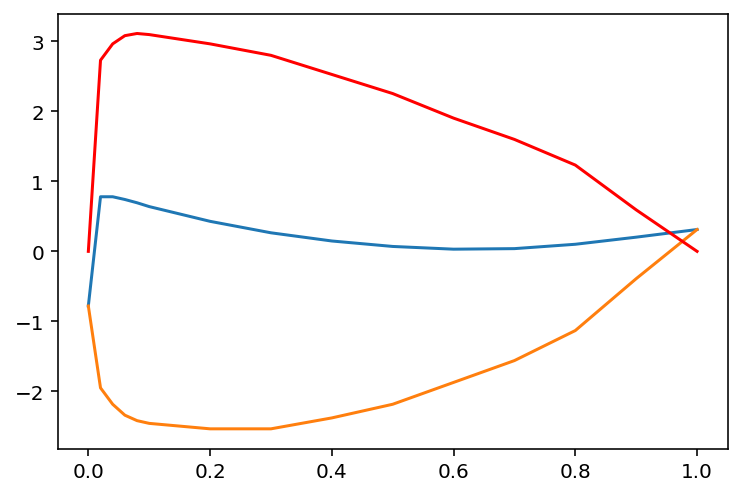

In [30]:
x = [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
cpl = np.array([-0.7800, 0.7800, 0.7800, 0.7410, 0.6942, 0.6396, 0.4290, 0.2652, 0.1482, 0.0702, 0.0312, 0.0390, 0.1014, 0.2028, 0.3120])
cpu = np.array([-0.780, -1.950, -2.184, -2.340, -2.418, -2.457, -2.535, -2.535, -2.379, -2.184, -1.872, -1.560, -1.131, -0.390, 0.312])
plt.plot(x, cpl)
plt.plot(x, cpu)
delta_cp = cpl - cpu
plt.plot(x, delta_cp, color="red")

np.trapz(delta_cp, x)

[0.         0.00774677 0.01466056 0.02074136 0.02598917 0.030404
 0.03398584 0.03673469 0.03865056 0.03973344 0.03999896 0.03996252
 0.03987401 0.03973344 0.03954082 0.03929613 0.03899938 0.03865056
 0.03824969 0.03779675 0.03729175 0.03673469 0.03612557 0.03546439
 0.03475115 0.03398584 0.03316847 0.03229904 0.03137755 0.030404
 0.02937838 0.02830071 0.02717097 0.02598917 0.02475531 0.02346939
 0.0221314  0.02074136 0.01929925 0.01780508 0.01625885 0.01466056
 0.0130102  0.01130779 0.00955331 0.00774677 0.00588817 0.00397751
 0.00201479 0.        ]


(-0.05, 1.05, -0.001999947938359017, 0.04199890670553936)

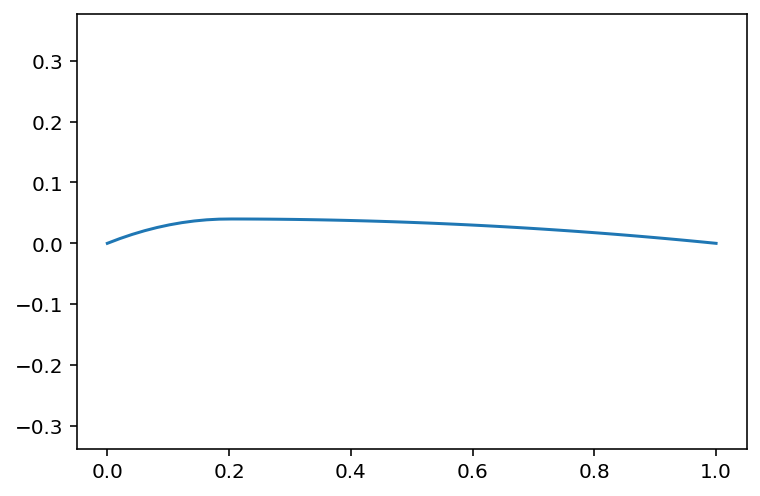

In [32]:
x = np.linspace(0,1)
y = np.linspace(0,1)
y[np.where(y<0.2)] = y[np.where(y<0.2)] * (0.4 - y[np.where(y<0.2)])
y[np.where(y>=0.2)] = (-1/16 * y[np.where(y>=0.2)]**2) + 1/40 * y[np.where(y>=0.2)] + 3/80
print(y)
plt.plot(x, y)
plt.axis("equal")

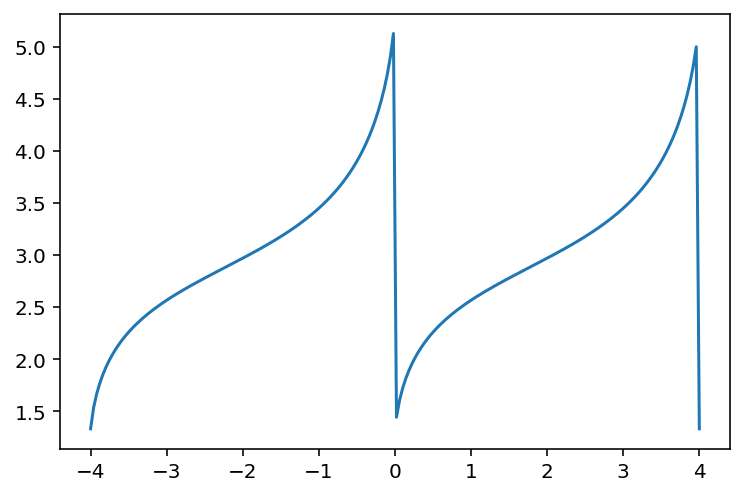

In [106]:
def func(x):
    return (x)**2

def find_coeffs(f, T, N):
    f_sample = 2 * N
    # we also need to use an integer sampling frequency, or the
    # points will not be equispaced between 0 and 1. We then add +2 to f_sample
    t, dt = np.linspace(0, T, f_sample + 2, endpoint=False, retstep=True)

    y = np.fft.rfft(f(t)) / t.size

    y *= 2
    return y[0].real, y[1:-1].real, -y[1:-1].imag

x=np.linspace(-4, 4, 200)
ell = 2
a0, a, b = find_coeffs(func, ell, 100)
total = a0
for i in range(len(a)):
    total = total + (np.sin(np.pi*i*x/ell) * b[i]) + (np.cos(np.pi*i*x/ell) * a[i])
    
plt.plot(x, total)